In [1]:
from __future__ import division,print_function, absolute_import
import keras
from keras.utils import to_categorical
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt
from keras.models import model_from_json
import os

Using TensorFlow backend.


In [2]:
mnist = keras.datasets.mnist
(x_train,y_train) , (x_test , y_test) = mnist.load_data()
x_train, x_test = x_train/225.0, x_test/225.0
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [3]:
y_test , y_train = to_categorical(y_test,10), to_categorical(y_train,10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train.shape[1:]

(28, 28, 1)

In [4]:
model = tf.keras.models.Sequential([
#1st layer
# Conv2D( number_of_filters , kernal_size , input_shape(add this parameter just for the input conv layer))
tf.keras.layers.Conv2D(64,(3,3),input_shape=x_train.shape[1:],activation='relu'),
tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
# defining the pooling for this layer
tf.keras.layers.MaxPooling2D(pool_size= (2,2)),
#2nd layer
tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
# defining the pooling for this layer
tf.keras.layers.MaxPooling2D(pool_size= (2,2)),

#FC layers
tf.keras.layers.Dropout(0.3),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation = 'relu'),
tf.keras.layers.Dropout(0.1),
tf.keras.layers.Dense(10,activation = 'softmax')
])


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
__________

In [6]:
model.compile(optimizer = "adam",
             loss = "categorical_crossentropy",
             metrics = ['accuracy'])
model.fit(x_train, y_train, batch_size = 256,epochs = 7,verbose = 1)

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Epoch 1/7
60000/60000 [==============================]60000/60000 [==============================] - 24s 397us/step - loss: 0.2015 - acc: 0.9367

Epoch 2/7
60000/60000 [==============================]60000/60000 [==============================] - 21s 355us/step - loss: 0.0494 - acc: 0.9848000 [=============>.....

Epoch 3/7
60000/60000 [==============================]60000/60000 [==============================] - ETA: 0s - loss: 0.0357 - acc: 0.988 - 21s 353us/step - loss: 0.0356 - acc: 0.9887

Epoch 4/7
60000/60000 [==============================]60000/60000 [==============================] - 21s 354us/step - loss: 0.0286 - acc: 0.9908

Epoch 5/7
60000/60000 [==============================]60000/60000 [==============================] - 21s 352us/step - loss: 0.0218 - acc: 0.9928

Epoch 6/7
60000/60000 [==============================]60000/60

7   6


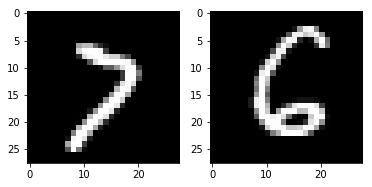

In [8]:
fig, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(x_test[880,:], cmap='gray')
ax1.imshow(x_test[98,:], cmap='gray')
img = np.array((X_test[880,:],X_test[98,:]))
pred = model.predict(img)
print(np.argmax(pred[0])," ",np.argmax(pred[1]))

In [9]:
# serialize model to JSON
model_json = model.to_json()
with open("model_cnn_mnist.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_cnn_mnist.h5")
print("Saved model to disk")

Saved model to disk
